## Nama: Joy Disanto Nupa
## NIM: 2209106014
## POSTEST 5 Kecerdasan buatan

#### LINK DATASET: https://www.kaggle.com/datasets/meirnizri/covid19-dataset/

# ________________________________________________________________________________________

### Kita siapkan library-librarynya untuk melakukan model DNN

In [21]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

### kita panggil dataset nya untuk dilakukan pemodelan

In [22]:
joy = pd.read_csv("Covid Data.csv")

###  menghitung dan menampilkan jumlah kemunculan (counts) setiap nilai yang terdapat dalam kolom 'PREGNANT' dari DataFrame joy, lalu kita mengganti nilai-nilai dalam kolom 'PREGNANT' dalam DataFrame joy dengan nilai-nilai yang berbeda.

In [23]:
joy.PREGNANT.value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [24]:
joy.loc[:, 'PREGNANT'] = joy.loc[:, 'PREGNANT'].replace(97, 2)
joy.loc[:, 'PREGNANT'] = joy.loc[:, 'PREGNANT'].replace(98, np.NAN)
joy.loc[:, 'PREGNANT'] = joy.loc[:, 'PREGNANT'].replace(2, 0)

joy.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,0.0,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,0.0,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,0.0,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,0.0,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,0.0,1,...,2,2,1,2,2,2,2,2,3,97


### mengganti nilai-nilai tertentu dalam kolom-kolom DataFrame joy yang memiliki 3 atau 4 nilai unik dengan nilai-nilai tertentu, dan kemudian mengganti nilai 97, 98, dan 99 dengan nilai NaN (missing value), serta mengganti nilai 2 dengan 0. 

In [25]:
var = joy.columns[(joy.nunique() == 3) | (joy.nunique() == 4)].tolist()
joy.loc[:, var] = joy.loc[:, var].replace([97, 98, 99], np.NAN)
joy.loc[:, var] = joy.loc[:, var].replace(2, 0)

joy.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,NaN,1.0,65,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN
1,2,1,2,1,03/06/2020,NaN,1.0,72,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,NaN
2,2,1,2,2,09/06/2020,1.0,0.0,55,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0
3,2,1,1,1,12/06/2020,NaN,0.0,53,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN
4,2,1,2,1,21/06/2020,NaN,0.0,68,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN


### kita mengubah data di "DATA_DIED" menjadi 0 dan 1 dan mengganti menjadi "DIED"

In [26]:
joy['DIED'] = np.where(joy['DATE_DIED'] == '9999-99-99', 0, 1)
joy.drop(columns='DATE_DIED', inplace=True)

joy.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,NaN,1.0,65,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1
1,2,1,2,1,NaN,1.0,72,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,NaN,1
2,2,1,2,2,1.0,0.0,55,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1
3,2,1,1,1,NaN,0.0,53,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN,1
4,2,1,2,1,NaN,0.0,68,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,NaN,1


### kita hapus kolom "INTUBED" dan "ICU"

In [27]:
joy.drop(columns=['INTUBED','ICU'], inplace=True)

### kita lakukan encoding "MEDICAL_UNIT" dan "CLASIFFICATION_FINAL"

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categorical_cols = ["MEDICAL_UNIT", "CLASIFFICATION_FINAL"]
joy_categorical = encoder.fit_transform(joy[categorical_cols])
categorical_names = encoder.get_feature_names_out(categorical_cols)
joy_categorical = pd.DataFrame(joy_categorical, columns=categorical_names)

joy_categorical.head()

,MEDICAL_UNIT_1,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### kita gabungkan data hasil encoding ke dataframe

In [29]:
joy = pd.concat([joy, joy_categorical], axis=1)
joy.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,...,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_1,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,2,1,1,1,1.0,65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,2,1,1.0,72,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1,2,2,0.0,55,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,1,1,1,0.0,53,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,1,2,1,0.0,68,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### kita mengecek data duplikat ternyata ada 851823 data duplikat, lalu kita drop data yang terduplikat lalu kita tampilka lagi dan data sudah tidak terduplikasi

In [30]:
print("NIlai Duplikat: ")
joy.duplicated().sum()

NIlai Duplikat: 


851823

In [31]:
joy.drop_duplicates(inplace=True)

In [32]:
print("NIlai Duplikat: ")
joy.duplicated().sum()

NIlai Duplikat: 


0

### Kita melakukan penskalaan (scaling) pada kolom 'AGE' dalam DataFrame joy menggunakan Robust Scaler, yang merupakan salah satu teknik penskalaan dalam ilmu data. Robust Scaler adalah teknik penskalaan yang tahan terhadap outlier (data ekstrem). 

In [33]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
joy.AGE = scaler.fit_transform(joy.AGE.values.reshape(-1,1))

### Kita membagi data dalam DataFrame joy menjadi dua set data terpisah: set pelatihan (training) dan set pengujian (testing) untuk tujuan pemodelan dan evaluasi.

In [218]:
X = joy[['MEDICAL_UNIT_1','MEDICAL_UNIT_13']] 
y = joy['CLASIFFICATION_FINAL_4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Code ini digunakan untuk membuat dan melatih model regresi linier (Linear Regression) dengan menggunakan fitur yang telah dibagi menjadi X_train dan target yang telah dibagi menjadi y_train.

In [219]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Code ini digunakan untuk melakukan penskalaan (scaling) pada data fitur yang telah dibagi menjadi X_train dan X_test dengan menggunakan Standard Scaler.

In [220]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### kita membuat model sequential untuk melakukan model

In [221]:
model = Sequential()

### kita menambahkan layer-layer untuk mendefinisikan arsitektur model neural network dalam TensorFlow/Keras. disini kita menambahkan 3 layer dalam pendefinisiannya 

In [222]:
model.add(layers.Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### kita melakukan compile model , kita menggunakan optimizer adam, loss Mean Squared Error (MSE) dan metrics accuracy

In [223]:
model.compile(optimizer='adam', 
              loss = 'mse',
             metrics = ['accuracy'])

### kita menjalankan test  fit model untuk menampilkan loss dan akurasinya

In [224]:
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/5
9838/9838 [==============================] - 23s 2ms/step - loss: 0.0096 - accuracy: 0.9916 - val_loss: 0.0083 - val_accuracy: 0.9917
Epoch 2/5
9838/9838 [==============================] - 21s 2ms/step - loss: 0.0082 - accuracy: 0.9917 - val_loss: 0.0083 - val_accuracy: 0.9917
Epoch 3/5
9838/9838 [==============================] - 22s 2ms/step - loss: 0.0082 - accuracy: 0.9917 - val_loss: 0.0083 - val_accuracy: 0.9917
Epoch 4/5
9838/9838 [==============================] - 23s 2ms/step - loss: 0.0082 - accuracy: 0.9917 - val_loss: 0.0083 - val_accuracy: 0.9917
Epoch 5/5
9838/9838 [==============================] - 24s 2ms/step - loss: 0.0082 - accuracy: 0.9917 - val_loss: 0.0083 - val_accuracy: 0.9917


### kita melakukan evaluasi untuk mengetahui nilai R2 score nya

In [225]:
if isinstance(y_test.iloc[0], (int, float)):  
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print("R-squared Score:", r2)
else:  
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int) 
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

1230/1230 [==============================] - 2s 1ms/step
R-squared Score: -0.000303623570247602


### Disini kita menambahkan line plot yang menampilkan informasi Training dan validation accuracy serta Training dan validation loss.

### -Terlihat di Training dan validation accuracy, pada lineplot validation accuracy untuk pergerakan line nya stabil di 0.9916xxx dan pada lineplot Training accuracy untuk pergerakan line nya meningkat dari awalnya 0.9915xxx menjadi stabil di angka 0.9917xxx 
### -Terlihat di Training dan validation loss, pada lineplot validation loss untuk pergerakan line nya stabil di 0.0083xxx dan pada lineplot Training loss untuk pergerakan line nya turun dari 0.0096xxx menjadi stabil di angka 0.0082xxx

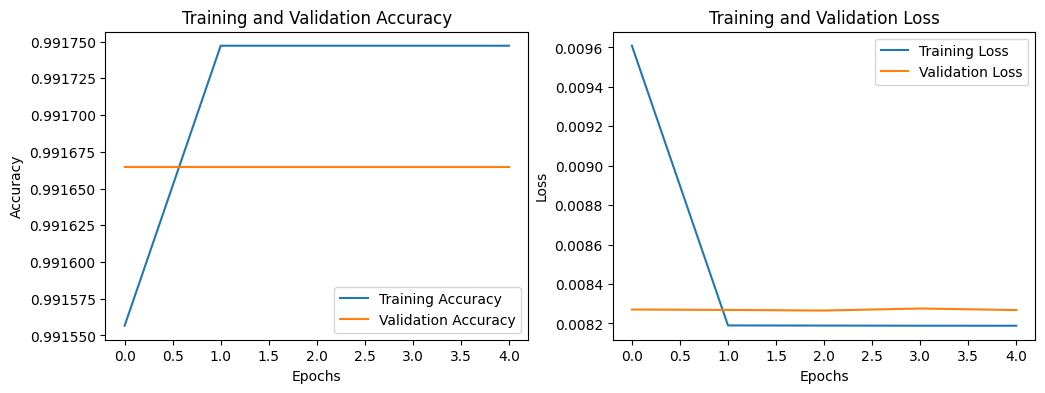

In [226]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()